# 反爬：驗證碼處理

* 了解「驗證碼機制」的反爬蟲機制
* 「驗證碼機制」反爬蟲的因應策略


## 作業目標

* 讀讀看「test」資料夾下的圖檔！
* 像 test/test2.png 這種複雜的圖片怎麼辦？


### 讀讀看「test」資料夾下的圖檔！

In [9]:
import requests
import pytesseract
from PIL import Image
from io import BytesIO

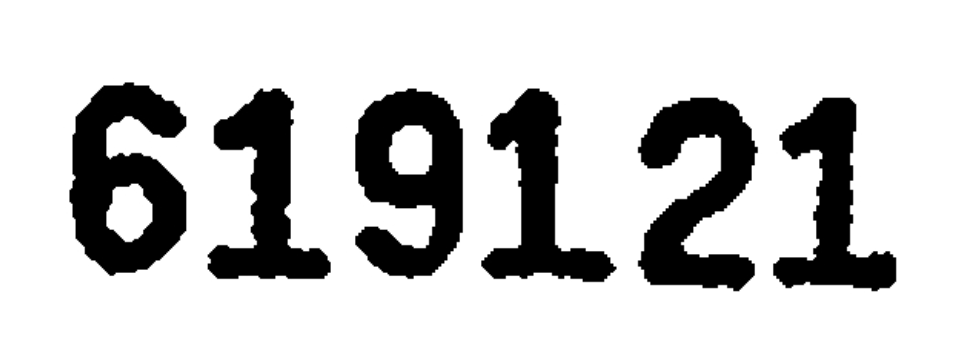

In [10]:
img1 = Image.open("test/test1.png")
img1

In [11]:
text1 = pytesseract.image_to_string(img1)
print(text1)

619121


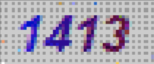

In [41]:
img2 = Image.open("test/test2.png")
img2

In [42]:
text2 = pytesseract.image_to_string(img2)
print(text2)

1413


### 像 test/test2.png 這種複雜的圖片怎麼辦？

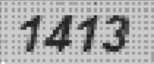

In [39]:
img2 = Image.open("test/test2.png").convert("L")
img2

In [40]:
text2 = pytesseract.image_to_string(img2)
print(text2)

4413


In [15]:
from PIL import Image
import pytesseract
import cv2 
import matplotlib.pyplot as plot
import numpy as np

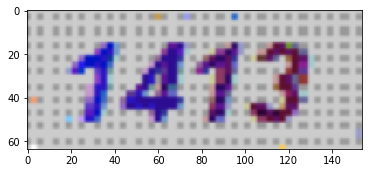

In [16]:
# 讀取圖片 默認為BGR
img = cv2.imread("test/test2.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plot.imshow(img)
plot.show()

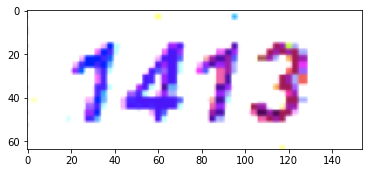

In [45]:
# 調整對比度，alpha為對比、beta為亮度
alpha = 1.7
beta = 0
adjusted = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
plot.imshow(adjusted)
plot.show()

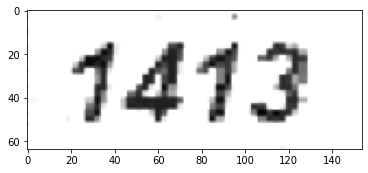

In [46]:
# 轉為黑白(0~255) 255最白 0 最黑
img2 = cv2.cvtColor(adjusted,cv2.COLOR_RGB2GRAY)
plot.imshow(img2,cmap="gray")
plot.show()

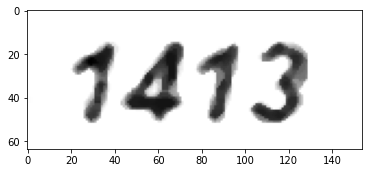

In [47]:
# 模糊化 (去除噪點)
blur = cv2.medianBlur(img2,5)
plot.imshow(blur,cmap='gray')
plot.show()

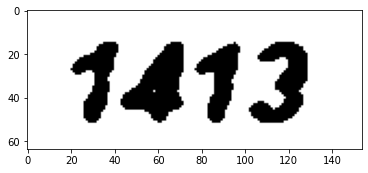

In [53]:
# 圖片二值化
ret, blur = cv2.threshold(blur,250, 255, cv2.THRESH_BINARY)
plot.imshow(blur,cmap="gray")
plot.show()

# 在這個mode小於250的像素全部歸0，大於250的像素變成255

In [54]:
text2 = pytesseract.image_to_string(blur)
print(text2)

41413
